In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as sco
import scipy.integrate as sci
from qutip import *
from matplotlib import colors
from tqdm import tqdm
import os
import sys
import time as t
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [4]:
delta=5
tau=80
etaf=30
eta=lambda t: etaf*np.tanh(t/tau)
tmax=200
xi=2

def f(t,var):
    x1=var[0]+var[1]*1.0j
    x2=var[2]+var[3]*1.0j

    res1=-1.0j*delta/2*x1+eta(t)*np.conjugate(x1)-x1**4*np.conjugate(x1)**3+1.0j*xi*x2/4
    res2=-1.0j*delta/2*x2+eta(t)*np.conjugate(x2)-x2**4*np.conjugate(x2)**3+1.0j*xi*x1/4

    return [np.real(res1),np.imag(res1),np.real(res2),np.imag(res2)]

x=np.linspace(0,1,15000)

t=tmax*(100**x-1)/99

sol=sci.solve_ivp(f,[0,tmax],y0=np.array([1,2,0.9,0.1]),dense_output=True,method="LSODA",rtol=5e-14,atol=1e-14)
resultado=sol.sol(t)

#t2=np.linspace(tau*np.arctanh(delta/(2*etaf)),t[-1],10000)

#func_aux=lambda t: np.where(t==t2[0],0,1)

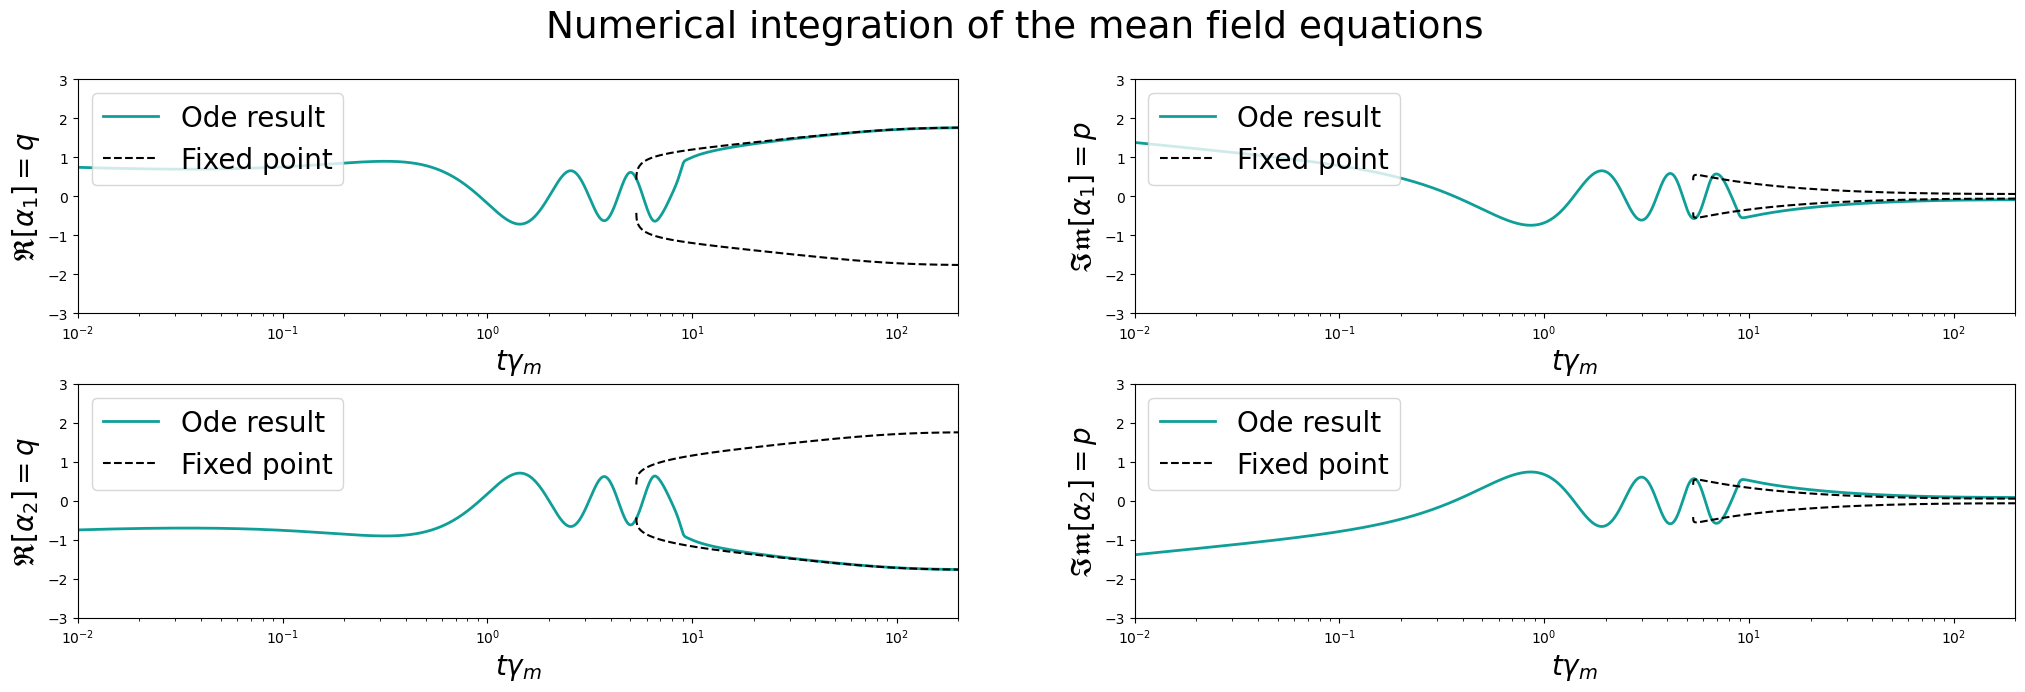

In [5]:
fig,ax=plt.subplots(2,2,figsize=(25,7))

t2=t
func_aux=lambda t: np.where(t==t2[0],0,1)

fig.suptitle('Numerical integration of the mean field equations', fontsize=27)


ax[0,0].plot(t,resultado[0,:],linewidth=2,label="Ode result",color="#109f98")

ax[0,0].plot(t,(eta(t)/2)**(1/6)*(4-(delta/eta(t)-xi/(2*eta(t)))**2)**(1/12)*np.cos(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(4-(delta/eta(t)-xi/(2*eta(t)))**2))))*func_aux(t),linestyle="--",label="Fixed point",color="#000000")
ax[0,0].plot(t,-(eta(t)/2)**(1/6)*(4-(delta/eta(t)-xi/(2*eta(t)))**2)**(1/12)*np.cos(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(4-(delta/eta(t)-xi/(2*eta(t)))**2))))*func_aux(t),linestyle="--",color="#000000")
ax[0,0].set_xlabel(r"$t\gamma_m$",fontsize=20)
ax[0,0].set_ylabel(r"$\mathfrak{R}[\alpha_{1}]=q$",fontsize=20)
ax[0,0].set_xlim(10**(-2),10**(np.log10(tmax)))
ax[0,0].set_ylim(-3,3)

ax[0,0].legend(loc="upper left",fontsize=20)

ax[0,0].set_xscale("log")


ax[0,1].plot(t,resultado[1,:],linewidth=2,label="Ode result",color="#109f98")

ax[0,1].plot(t,(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.sin(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",label="Fixed point",color="#000000")
ax[0,1].plot(t,-(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.sin(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",color="#000000")


ax[0,1].set_xlabel(r"$t\gamma_m$",fontsize=20)
ax[0,1].set_ylabel(r"$\mathfrak{Im}[\alpha_{1}]=p$",fontsize=20)
ax[0,1].set_xlim(10**(-2),10**(np.log10(tmax)))

ax[0,1].legend(loc="upper left",fontsize=20)

ax[0,1].set_xscale("log")

ax[0,1].set_ylim(-3,3)







ax[1,0].plot(t,resultado[2,:],linewidth=2,label="Ode result",color="#109f98")
ax[1,0].plot(t,(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.cos(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",label="Fixed point",color="#000000")
ax[1,0].plot(t,-(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.cos(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",color="#000000")


ax[1,0].set_xlabel(r"$t\gamma_m$",fontsize=20)
ax[1,0].set_ylabel(r"$\mathfrak{R}[\alpha_{2}]=q$",fontsize=20)
ax[1,0].set_xlim(10**(-2),10**(np.log10(tmax)))
ax[1,0].set_ylim(-3,3)

ax[1,0].legend(loc="upper left",fontsize=20)

#ax[1,0].axvline(tau*np.arctanh((xi/4+delta/2)/etaf))
#ax[1,0].axvline(tau*np.arctanh(np.abs(xi/4-delta/2)/etaf))
ax[1,0].set_xscale("log")

ax[1,1].plot(t,resultado[3,:],linewidth=2,label="Ode result",color="#109f98")

ax[1,1].plot(t,(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.sin(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",label="Fixed point",color="#000000")
ax[1,1].plot(t,-(eta(t))**(1/6)*(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2)**(1/12)*np.sin(0.5*np.arctan((xi/(4*eta(t))-delta/(2*eta(t)))/(np.sqrt(1-(delta/(2*eta(t))-xi/(4*eta(t)))**2))))*func_aux(t),linestyle="--",color="#000000")


ax[1,1].set_xlabel(r"$t\gamma_m$",fontsize=20)
ax[1,1].set_ylabel(r"$\mathfrak{Im}[\alpha_{2}]=p$",fontsize=20)
ax[1,1].set_xlim(10**(-2),10**(np.log10(tmax)))

ax[1,1].legend(loc="upper left",fontsize=20)

ax[1,1].set_xscale("log")
ax[1,1].set_ylim(-3,3)

plt.subplots_adjust(hspace=0.3)
plt.savefig("integracion_numerical_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")


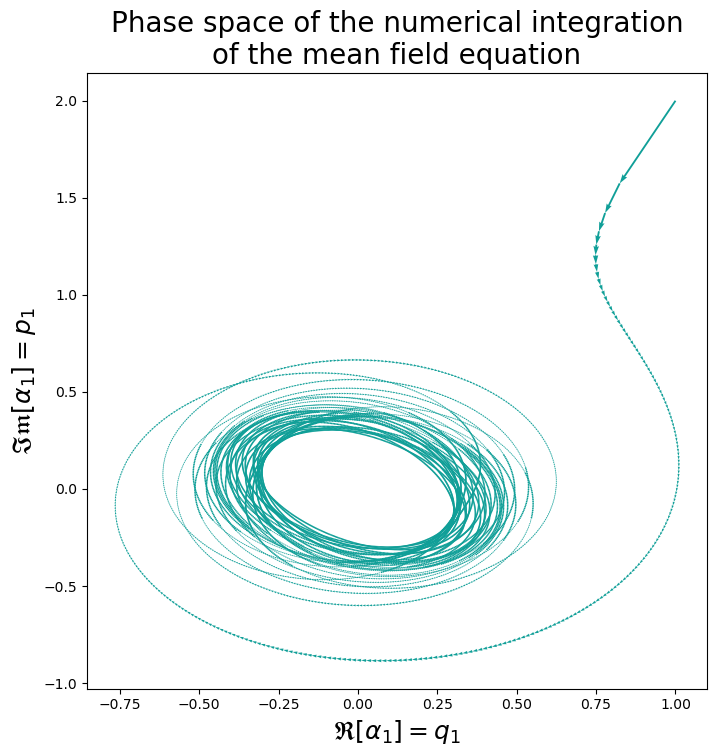

In [4]:

#sol=sci.solve_ivp(f,[0,3*tau],y0=np.array([0.2,-0.1]),dense_output=True,method="LSODA",rtol=5e-14,atol=1e-15)
#resultado=sol.sol(t)


delta=10
tau=80
etaf=2
eta=lambda t: etaf*np.tanh(t/tau)
tmax=60
xi=5

def f(t,var):
    x1=var[0]+var[1]*1.0j
    x2=var[2]+var[3]*1.0j

    res1=-1.0j*delta/2*x1+eta(t)*np.conjugate(x1)-x1**4*np.conjugate(x1)**3+1.0j*xi*x2/4
    res2=-1.0j*delta/2*x2+eta(t)*np.conjugate(x2)-x2**4*np.conjugate(x2)**3+1.0j*xi*x1/4

    return [np.real(res1),np.imag(res1),np.real(res2),np.imag(res2)]

t=np.linspace(0,tmax,15000)

#t=tmax*(100**x-1)/99

sol=sci.solve_ivp(f,[0,tmax],y0=np.array([1,2,0.9,0.1]),dense_output=True,method="LSODA",rtol=5e-14,atol=1e-14)
resultado=sol.sol(t)

#plt.rcParams.update({'legend.fontsize': 10})





plt.figure(1,figsize=(8,8))
plt.title("Phase space of the numerical integration\nof the mean field equation",fontsize=20)



q=resultado[0,:]
p=resultado[1,:]

uq,up=q[1:]-q[0:-1],p[1:]-p[0:-1]




plt.quiver(q[:-1],p[:-1],uq,up,scale_units="xy",angles='xy',scale=1,color="#109f98",width=0.003,label="QJT")



plt.xlabel(r"$\mathfrak{R}[\alpha_1]=q_1$",fontsize=18)
plt.ylabel(r"$\mathfrak{Im}[\alpha_1]=p_1$",fontsize=18)

plt.savefig("integracion_numerica_phase_11_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")


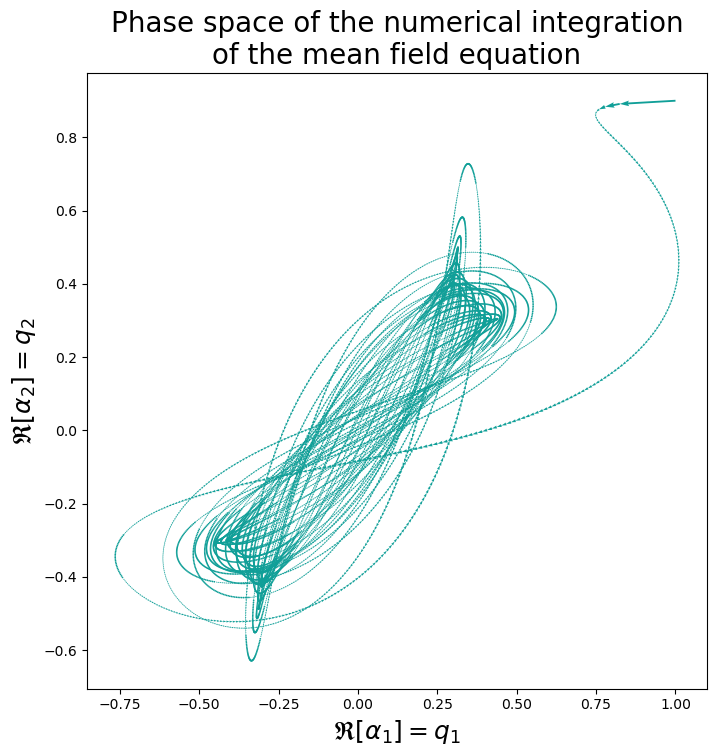

In [5]:
#sol=sci.solve_ivp(f,[0,3*tau],y0=np.array([0.2,-0.1]),dense_output=True,method="LSODA",rtol=5e-14,atol=1e-15)
#resultado=sol.sol(t)




#plt.rcParams.update({'legend.fontsize': 10})





plt.figure(1,figsize=(8,8))
plt.title("Phase space of the numerical integration\nof the mean field equation",fontsize=20)



q=resultado[0,:]
p=resultado[2,:]

uq,up=q[1:]-q[0:-1],p[1:]-p[0:-1]




plt.quiver(q[:-1],p[:-1],uq,up,scale_units="xy",angles='xy',scale=1,color="#109f98",width=0.003,label="QJT")



plt.xlabel(r"$\mathfrak{R}[\alpha_1]=q_1$",fontsize=18)
plt.ylabel(r"$\mathfrak{R}[\alpha_2]=q_2$",fontsize=18)
plt.savefig("integracion_numerica_phase_21_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")

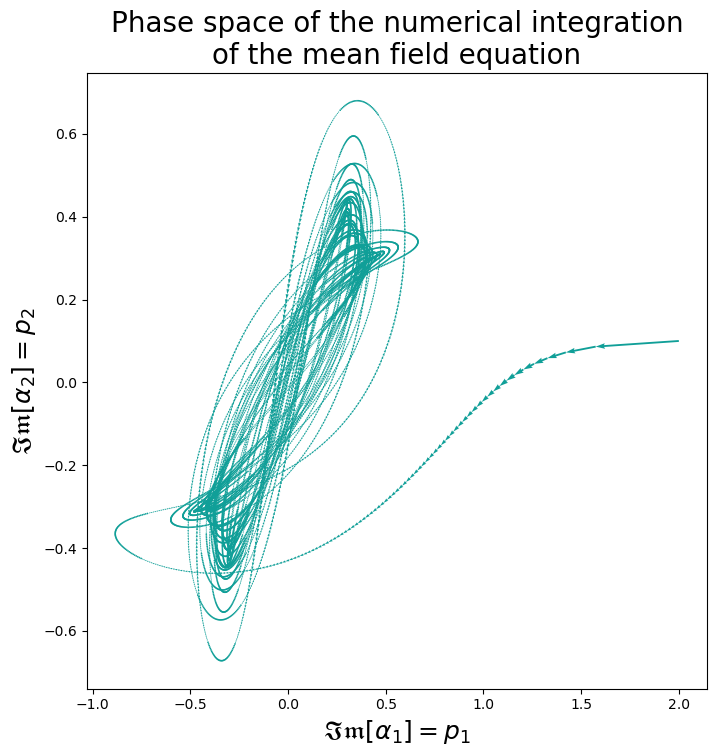

In [6]:
#sol=sci.solve_ivp(f,[0,3*tau],y0=np.array([0.2,-0.1]),dense_output=True,method="LSODA",rtol=5e-14,atol=1e-15)
#resultado=sol.sol(t)




#plt.rcParams.update({'legend.fontsize': 10})





plt.figure(1,figsize=(8,8))
plt.title("Phase space of the numerical integration\nof the mean field equation",fontsize=20)



q=resultado[1,:]
p=resultado[3,:]

uq,up=q[1:]-q[0:-1],p[1:]-p[0:-1]




plt.quiver(q[:-1],p[:-1],uq,up,scale_units="xy",angles='xy',scale=1,color="#109f98",width=0.003,label="QJT")



plt.xlabel(r"$\mathfrak{Im}[\alpha_1]=p_1$",fontsize=18)
plt.ylabel(r"$\mathfrak{Im}[\alpha_2]=p_2$",fontsize=18)

plt.savefig("integracion_numerica_phase_21_p_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")

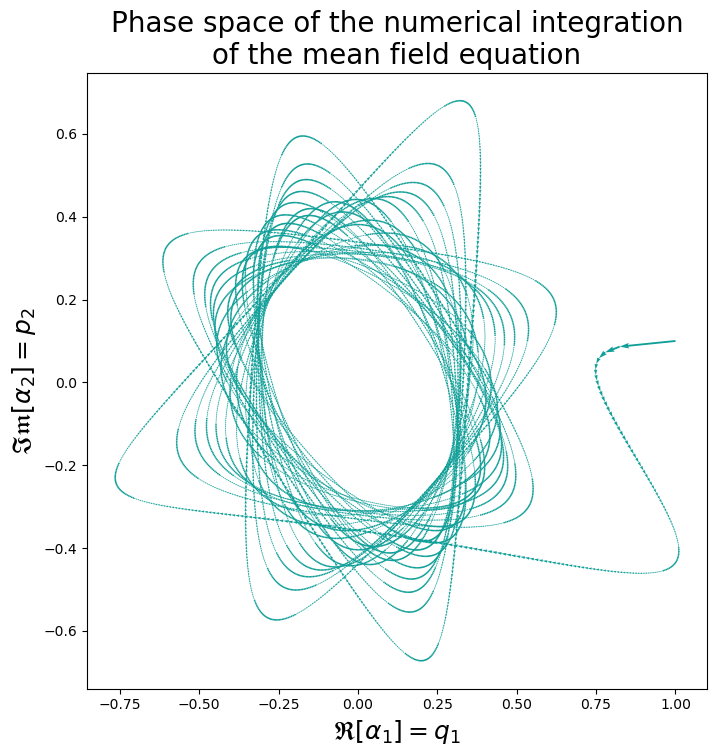

In [7]:
#plt.rcParams.update({'legend.fontsize': 10})





plt.figure(1,figsize=(8,8))
plt.title("Phase space of the numerical integration\nof the mean field equation",fontsize=20)



q=resultado[0,:]
p=resultado[3,:]

uq,up=q[1:]-q[0:-1],p[1:]-p[0:-1]




plt.quiver(q[:-1],p[:-1],uq,up,scale_units="xy",angles='xy',scale=1,color="#109f98",width=0.003,label="QJT")



plt.xlabel(r"$\mathfrak{R}[\alpha_1]=q_1$",fontsize=18)
plt.ylabel(r"$\mathfrak{Im}[\alpha_2]=p_2$",fontsize=18)

plt.savefig("integracion_numerica_phase_21_pq_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")

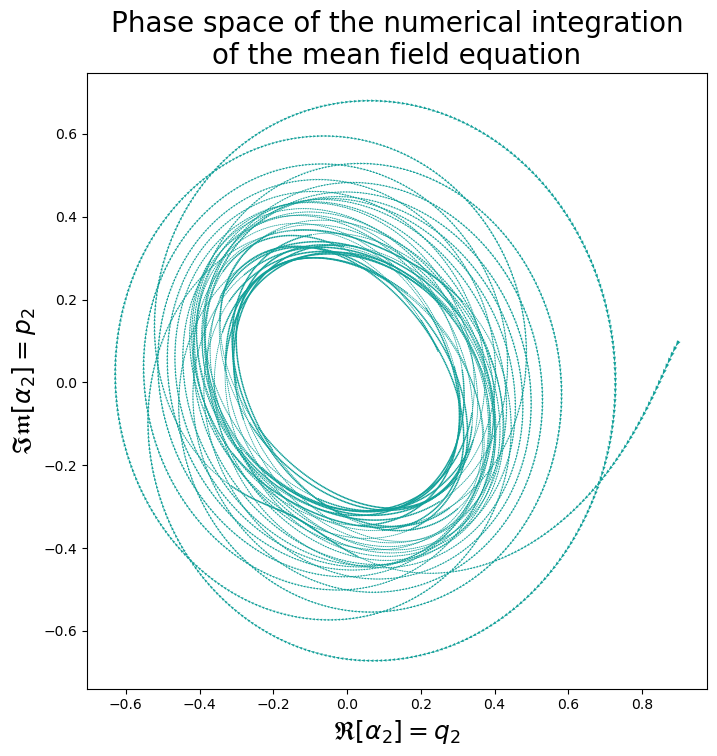

In [8]:
#plt.rcParams.update({'legend.fontsize': 10})





plt.figure(1,figsize=(8,8))
plt.title("Phase space of the numerical integration\nof the mean field equation",fontsize=20)



q=resultado[2,:]
p=resultado[3,:]

uq,up=q[1:]-q[0:-1],p[1:]-p[0:-1]




plt.quiver(q[:-1],p[:-1],uq,up,scale_units="xy",angles='xy',scale=1,color="#109f98",width=0.003,label="QJT")



plt.xlabel(r"$\mathfrak{R}[\alpha_2]=q_2$",fontsize=18)
plt.ylabel(r"$\mathfrak{Im}[\alpha_2]=p_2$",fontsize=18)

plt.savefig("integracion_numerica_phase_22_etaf_"+str(etaf)+"_delta_"+str(delta)+"_tau_"+str(tau)+".png",format="png",bbox_inches="tight")

In [302]:
def lambda1(eta,xi,delta):
    a=xi/eta
    b=delta/eta

    return np.emath.sqrt((-4*b**2+4*a*b-a**2+16)*eta**2-96*(1-(a/4-b/2)**2)**(1/6)*eta**(4/3)+144*(1-(a/4-b/2)**2)**(1/3)*eta**(2/3))-16*(1-(a/4-b/2)**2)**(1/4)*np.sqrt(eta)

def lambda2(eta,xi,delta):
    a=xi/eta
    b=delta/eta

    return np.emath.sqrt((-4*b**2-4*a*b-a**2+16)*eta**2-96*np.emath.power((1-(a/4-b/2)**2),1/6)*eta**(4/3)+144*np.emath.power((1-(a/4-b/2)**2),1/3)*eta**(2/3))-16*np.emath.power((1-(a/4-b/2)**2),1/4)*np.emath.sqrt(eta)


def lambda1(eta,Q):

    #return np.emath.sqrt(16*(1-Q**2)*eta**2-96*np.emath.power((1-(Q)**2),1/6)*eta**(4/3)+144*np.emath.power((1-(Q)**2),1/3)*eta**(2/3))-16*np.emath.power((1-(Q)**2),1/4)*np.sqrt(eta)
    return -4*eta*np.emath.sqrt(1-Q**2)+np.emath.sqrt(9*eta**2*(1-Q**2)-6*np.cos(np.emath.arcsin(Q))*eta**2*np.emath.sqrt(1-Q**2)+(1-Q**2)*eta**2)





Q=np.linspace(-1,1,2000)
eta=np.linspace(0.01,100,2000)

Grid_eta,Grid_Q=np.meshgrid(eta,Q)

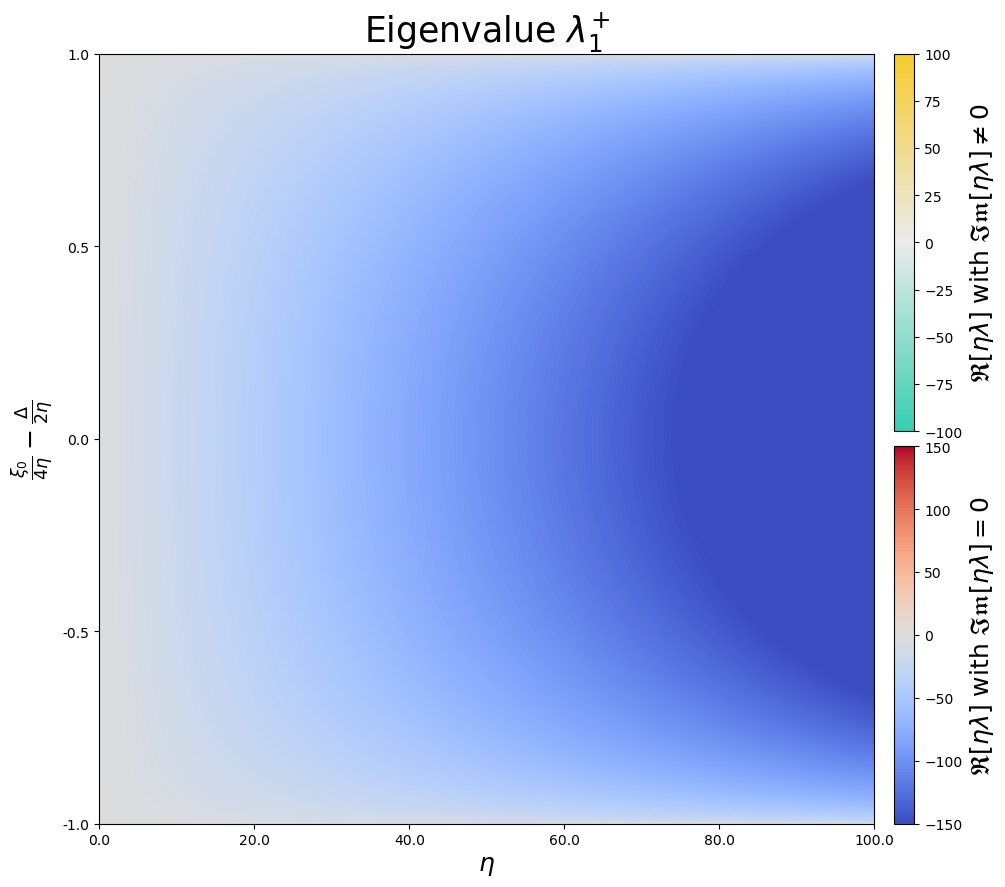

In [262]:
from matplotlib.cm import get_cmap,ScalarMappable
from matplotlib.colors import Normalize

l1=lambda1(Grid_eta,Grid_Q)
# Crear matriz de números complejos
H, W = l1.shape
Z = l1

nx,ny=l1.shape


# Máscaras
real_mask = np.isclose(Z.imag, 0, atol=1e-8)
imag_mask = ~real_mask

# Crear imagen RGBA vacía
image = np.zeros((H, W, 4))


color = ['#37cfb2', '#ebebeb', '#f7cc2f']
mi_cmap = LinearSegmentedColormap.from_list("cmap_centrada_en_cero", color)

mi_cmap = LinearSegmentedColormap.from_list("mi_colormap", color)


# Colormaps
cmap_real = plt.get_cmap('coolwarm')
cmap_imag = mi_cmap

# Aplicar cmap_real si hay reales
if np.any(real_mask):
    real_vals = Z.real[real_mask]
    norm_real = TwoSlopeNorm(vmin=-150, vcenter=0, vmax=150)
    image[real_mask] = cmap_real(norm_real(real_vals))

# Aplicar cmap_imag si hay imaginarios
if np.any(imag_mask):
    imag_vals = Z.real[imag_mask]
    norm_imag = TwoSlopeNorm(vmin=-50, vcenter=0, vmax=50)
    image[imag_mask] = cmap_imag(norm_imag(imag_vals))

# Mostrar imagen
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(image, origin='lower', extent=[0, W, 0, H], aspect='auto')


x_ticks = np.linspace(0, nx, 6)  # 6 ticks de 0 a nx
x_labels = np.linspace(eta.min(), eta.max(), 6)  # Etiquetas de 0 a 100

y_ticks = np.linspace(0, ny, 5)  # 5 ticks de 0 a ny
y_labels = np.linspace(Q.min(), Q.max(), 5)

# Aplicar ticks personalizados
ax.set_xticks(x_ticks, np.round(x_labels,decimals=0))
ax.set_yticks(y_ticks, y_labels)


ax.set_ylabel(r"$\frac{\xi_0}{4\eta}-\frac{\Delta}{2\eta}$",fontsize=18)
ax.set_xlabel(r"$\eta$",fontsize=18)


# Crear dos ScalarMappables solo para las colorbars
sm_real = ScalarMappable(cmap=cmap_real, norm=norm_real)
sm_real.set_array([])

sm_imag = ScalarMappable(cmap=cmap_imag, norm=norm_imag)
sm_imag.set_array([])

# Posición horizontal
cbar_x = 0.92
# Altura total disponible (por ejemplo, 80% de la figura)
total_height = 0.77
# Separación entre las barras
gap = 0.015
# Altura de cada barra
each_height = (total_height - gap) / 2
# Y posiciones desde abajo
bottom_real = 0.11
bottom_imag = bottom_real + each_height + gap
width = 0.02

# Barra para parte real (abajo)
cax_real = fig.add_axes([cbar_x, bottom_real, width, each_height])
cbar_real = fig.colorbar(sm_real, cax=cax_real)
cbar_real.set_label(r"$\mathfrak{R}\left[\eta\lambda\right]$ with $\mathfrak{Im}\left[\eta\lambda\right]= 0$",fontsize=18)

# Barra para parte imaginaria (arriba)
cax_imag = fig.add_axes([cbar_x, bottom_imag, width, each_height])
cbar_imag = fig.colorbar(sm_imag, cax=cax_imag)
cbar_imag.set_label(r"$\mathfrak{R}\left[\eta\lambda\right]$ with $\mathfrak{Im}\left[\eta\lambda\right]\neq 0$",fontsize=18)

ax.set_title(r"Eigenvalue $\lambda_1^{+}$",fontsize=25)


plt.savefig("lambda_1.png",format="png",bbox_inches="tight")

In [263]:
lambda1(100,-1)


0.0

In [224]:
def lambda2(eta,Q):

    #return np.emath.sqrt(16*(1-(Q+10/eta)**2)*eta**2-96*np.emath.power((1-(Q)**2),1/6)*eta**(4/3)+144*np.emath.power((1-(Q)**2),1/3)*eta**(2/3))-16*np.emath.power((1-(Q)**2),1/4)*np.sqrt(eta)
    return -4*eta*np.emath.sqrt(1-Q**2)+np.emath.sqrt(9*eta**2*(1-Q**2)-6*np.cos(np.emath.arcsin(Q))*eta**2*np.emath.sqrt(1-Q**2)+(1-(Q+15/eta)**2)*eta**2)
    
Q=np.linspace(-1,1,2000)
eta=np.linspace(0.01,100,2000)

Grid_eta,Grid_Q=np.meshgrid(eta,Q)


l2=lambda2(Grid_eta,Grid_Q)

In [225]:
lambda2(8,-1)

3.872983346207417

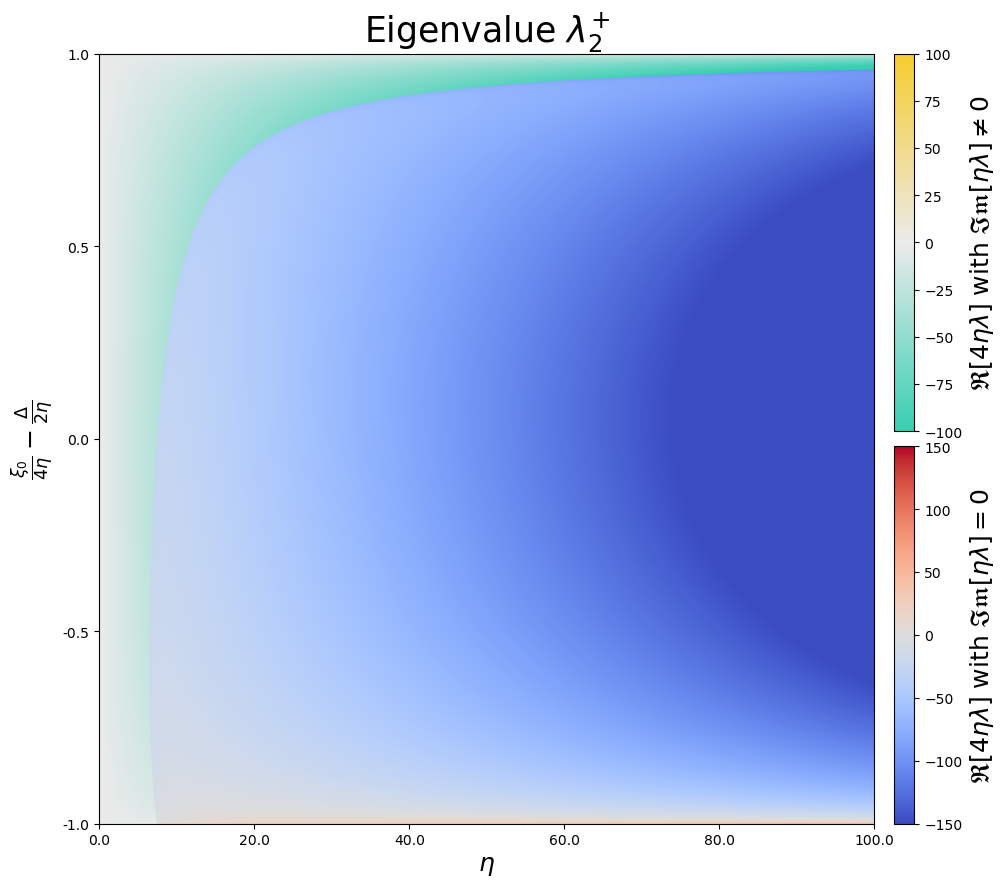

In [226]:
from matplotlib.cm import get_cmap,ScalarMappable
from matplotlib.colors import Normalize


# Crear matriz de números complejos
H, W = l2.shape
Z = l2

# Máscaras
real_mask = np.isclose(Z.imag, 0, atol=1e-8)
imag_mask = ~real_mask

# Crear imagen RGBA vacía
image = np.zeros((H, W, 4))


color = ['#37cfb2', '#ebebeb', '#f7cc2f']
mi_cmap = LinearSegmentedColormap.from_list("cmap_centrada_en_cero", color)

mi_cmap = LinearSegmentedColormap.from_list("mi_colormap", color)


# Colormaps
cmap_real = plt.get_cmap('coolwarm')
cmap_imag = mi_cmap

# Aplicar cmap_real si hay reales
if np.any(real_mask):
    real_vals = Z.real[real_mask]
    norm_real = TwoSlopeNorm(vmin=-150, vcenter=0, vmax=150)
    image[real_mask] = cmap_real(norm_real(real_vals))

# Aplicar cmap_imag si hay imaginarios
if np.any(imag_mask):
    imag_vals = Z.real[imag_mask]
    norm_imag = TwoSlopeNorm(vmin=-100, vcenter=0, vmax=100)
    image[imag_mask] = cmap_imag(norm_imag(imag_vals))

# Mostrar imagen
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(image, origin='lower', extent=[0, W, 0, H], aspect='auto')


x_ticks = np.linspace(0, nx, 6)  # 6 ticks de 0 a nx
x_labels = np.linspace(eta.min(), eta.max(), 6)  # Etiquetas de 0 a 100

y_ticks = np.linspace(0, ny, 5)  # 5 ticks de 0 a ny
y_labels = np.linspace(Q.min(), Q.max(), 5)

# Aplicar ticks personalizados
ax.set_xticks(x_ticks, np.round(x_labels,decimals=0))
ax.set_yticks(y_ticks, y_labels)


ax.set_ylabel(r"$\frac{\xi_0}{4\eta}-\frac{\Delta}{2\eta}$",fontsize=18)
ax.set_xlabel(r"$\eta$",fontsize=18)


# Crear dos ScalarMappables solo para las colorbars
sm_real = ScalarMappable(cmap=cmap_real, norm=norm_real)
sm_real.set_array([])

sm_imag = ScalarMappable(cmap=cmap_imag, norm=norm_imag)
sm_imag.set_array([])

# Posición horizontal
cbar_x = 0.92
# Altura total disponible (por ejemplo, 80% de la figura)
total_height = 0.77
# Separación entre las barras
gap = 0.015
# Altura de cada barra
each_height = (total_height - gap) / 2
# Y posiciones desde abajo
bottom_real = 0.11
bottom_imag = bottom_real + each_height + gap
width = 0.02

# Barra para parte real (abajo)
cax_real = fig.add_axes([cbar_x, bottom_real, width, each_height])
cbar_real = fig.colorbar(sm_real, cax=cax_real)
cbar_real.set_label(r"$\mathfrak{R}\left[4\eta\lambda\right]$ with $\mathfrak{Im}\left[\eta\lambda\right]= 0$",fontsize=18)

# Barra para parte imaginaria (arriba)
cax_imag = fig.add_axes([cbar_x, bottom_imag, width, each_height])
cbar_imag = fig.colorbar(sm_imag, cax=cax_imag)
cbar_imag.set_label(r"$\mathfrak{R}\left[4\eta\lambda\right]$ with $\mathfrak{Im}\left[\eta\lambda\right]\neq 0$",fontsize=18)

ax.set_title(r"Eigenvalue $\lambda_2^{+}$",fontsize=25)


plt.savefig("lambda_2.png",format="png",bbox_inches="tight")